In [1]:
## carichiami risultati europee

import pandas as pd

url = "https://raw.githubusercontent.com/ondata/elezioni_europee_2024/main/data/liste.csv"

# unfortunately, the numbers are separated by a comma, so we need to specify the decimal separator
eu_df_raw = pd.read_csv(url, decimal=",")

In [2]:
eu_df_raw.head()

codice  pos                desc_lis                  img_lis min  \
0  2050540010    1                LIBERTA'   1-20240609000000-1.png   N   
1  2050540010   10  AZIONE - SIAMO EUROPEI  1-20240609000000-10.png   N   
2  2050540010   11     PACE TERRA DIGNITA'  1-20240609000000-11.png   N   
3  2050540010   12       FRATELLI D'ITALIA  1-20240609000000-12.png   N   
4  2050540010   13    STATI UNITI D'EUROPA  1-20240609000000-13.png   N   

   max_coll  voti   perc  CODICE ELETTORALE  CODICE ISTAT CODICE BELFIORE  
0       NaN    60   0.71         1050540010         28001            A001  
1       NaN   628   7.43         1050540010         28001            A001  
2       NaN   214   2.53         1050540010         28001            A001  
3       NaN  2997  35.45         1050540010         28001            A001  
4       NaN   286   3.38         1050540010         28001            A001

In [3]:
## let's get the shapefile
import geopandas as gpd

comuni_geojson_url="https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson"

# cache the file locally
import os

if not os.path.exists("limits_IT_municipalities.geojson"):
    import urllib.request
    urllib.request.urlretrieve(comuni_geojson_url, "limits_IT_municipalities.geojson")
else:
    print("File already downloaded")


comuni_italiani=gpd.read_file("limits_IT_municipalities.geojson")

File already downloaded


<Axes: >

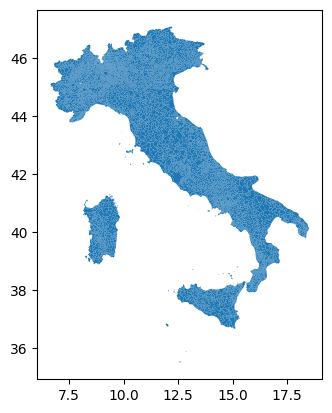

In [4]:
comuni_italiani.plot()

In [5]:
comuni_italiani.head()

name op_id name_de name_sl minint_elettorale minint_finloc  \
0            Agliè   130    None    None        1010810010    1010810010   
1          Airasca   131    None    None        1010810020    1010810020   
2     Ala di Stura   132    None    None        1010810030    1010810030   
3  Albiano d'Ivrea   133    None    None        1010810040    1010810040   
4           Almese   135    None    None        1010810060    1010810060   

  name_it prov_name prov_istat_code  prov_istat_code_num prov_acr  reg_name  \
0    None    Torino             001                    1       TO  Piemonte   
1    None    Torino             001                    1       TO  Piemonte   
2    None    Torino             001                    1       TO  Piemonte   
3    None    Torino             001                    1       TO  Piemonte   
4    None    Torino             001                    1       TO  Piemonte   

  reg_istat_code  reg_istat_code_num opdm_id com_catasto_code com_istat_code  \
0             01                   1       1             A074         001001   
1             01                   1       2             A109         001002   
2             01                   1       3             A117         001003   
3             01                   1       4             A157         001004   
4             01                   1       6             A218         001006   

   com_istat_code_num                                           geometry  
0                1001  MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3...  
1                1002  MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9...  
2                1003  MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3...  
3                1004  MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4...  
4                1006  MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1...

In [6]:
comuni_italiani.com_istat_code_num.nunique()

7899

In [7]:
eu_df_raw["CODICE ISTAT"].nunique()

7896

In [8]:
eu_df_raw.head()

codice  pos                desc_lis                  img_lis min  \
0  2050540010    1                LIBERTA'   1-20240609000000-1.png   N   
1  2050540010   10  AZIONE - SIAMO EUROPEI  1-20240609000000-10.png   N   
2  2050540010   11     PACE TERRA DIGNITA'  1-20240609000000-11.png   N   
3  2050540010   12       FRATELLI D'ITALIA  1-20240609000000-12.png   N   
4  2050540010   13    STATI UNITI D'EUROPA  1-20240609000000-13.png   N   

   max_coll  voti   perc  CODICE ELETTORALE  CODICE ISTAT CODICE BELFIORE  
0       NaN    60   0.71         1050540010         28001            A001  
1       NaN   628   7.43         1050540010         28001            A001  
2       NaN   214   2.53         1050540010         28001            A001  
3       NaN  2997  35.45         1050540010         28001            A001  
4       NaN   286   3.38         1050540010         28001            A001

In [9]:
# pivot eu_df_raw

eu_df = eu_df_raw.pivot(index="CODICE ISTAT", columns="desc_lis", values="perc")

In [10]:
## filtriamo comuni italiani to name, com_istat_code_num, geometry

comuni_italiani = comuni_italiani[["name", "com_istat_code_num", "geometry"]]

In [11]:
# uniamo i due dataframe

comuni_italiani_con_eu = comuni_italiani.merge(eu_df, left_on="com_istat_code_num", right_index=True, how="left")

In [12]:
comuni_italiani_con_eu["FRATELLI D\'ITALIA"].max()

67.34

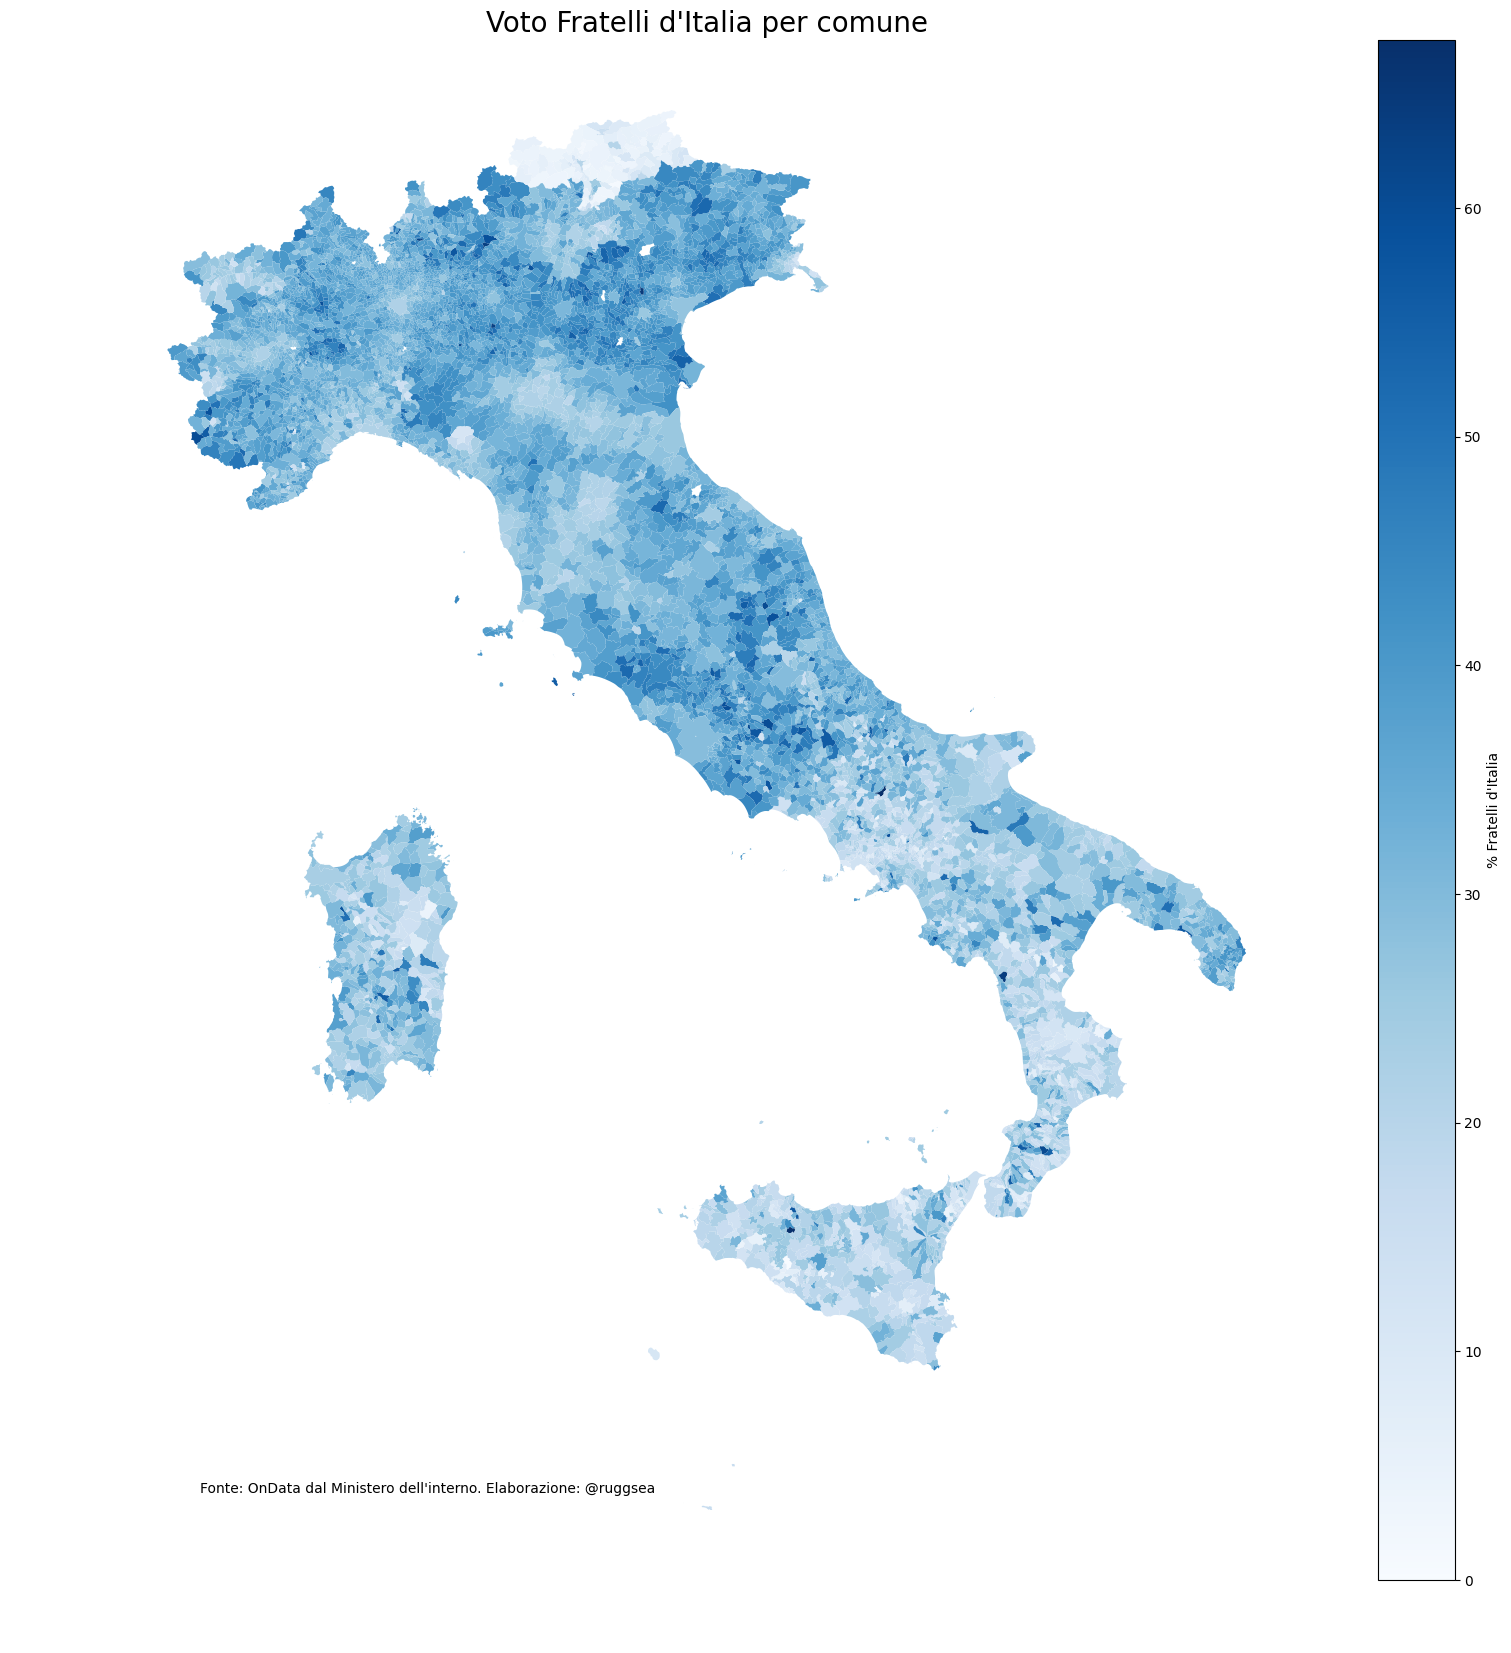

In [40]:
# first plot - Fratelli d'Italia by municipality

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

comuni_italiani_con_eu.plot(column="FRATELLI D'ITALIA", ax=ax, legend=True, cmap="Blues", legend_kwds={"label": "% Fratelli d'Italia"})
ax.set_title("Voto Fratelli d'Italia per comune")
# make title bigger
ax.title.set_size(20)
ax.axis("off")

ax.annotate("Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", xy=(0.1, .08), xycoords="figure fraction")

fig.savefig("fratelli_d_italia_europee_comune.png", dpi=300)
plt.show()

## Comparazione risultati vecchi

In [14]:
## carichiamo i dati delle politiche del 2022

politiche_2022_url="https://raw.githubusercontent.com/ondata/elezioni-politiche-2022/main/affluenza-risultati/dati/Eligendo/processing/Politiche2022_Scrutini_Camera_Italia.csv"

politiche_2022_raw = pd.read_csv(politiche_2022_url, decimal=",")

In [15]:
politiche_2022_raw.head()

cod  COMUNE  TIPO ELEZIONE DATA ELEZIONE COLLEGIO PLURINOMINALE  \
0  130230010  ALTINO  Camera Italia    25/09/2022          ABRUZZO - P01   
1  130230010  ALTINO  Camera Italia    25/09/2022          ABRUZZO - P01   
2  130230010  ALTINO  Camera Italia    25/09/2022          ABRUZZO - P01   
3  130230010  ALTINO  Camera Italia    25/09/2022          ABRUZZO - P01   
4  130230010  ALTINO  Camera Italia    25/09/2022          ABRUZZO - P01   

     COLLEGIO UNINOMINALE CIRCOSCRIZIONE NAZIONE PROVINCIA COGNOME  ...  \
0  ABRUZZO - U01 (CHIETI)        ABRUZZO  ITALIA    CHIETI  BAGNAI  ...   
1  ABRUZZO - U01 (CHIETI)        ABRUZZO  ITALIA    CHIETI  BAGNAI  ...   
2  ABRUZZO - U01 (CHIETI)        ABRUZZO  ITALIA    CHIETI  BAGNAI  ...   
3  ABRUZZO - U01 (CHIETI)        ABRUZZO  ITALIA    CHIETI  BAGNAI  ...   
4  ABRUZZO - U01 (CHIETI)        ABRUZZO  ITALIA    CHIETI  GRIPPA  ...   

                                       LISTA VOTANTI TOTALI ELETTORI TOTALI  \
0       FRATELLI D'ITALIA CON GIORGIA MELONI           1350            2288   
1                               FORZA ITALIA           1350            2288   
2                   LEGA PER SALVINI PREMIER           1350            2288   
3  NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC           1350            2288   
4                         MOVIMENTO 5 STELLE           1350            2288   

   VOTI CANDIDATO  VOTI SOLO CANDIDATO  VOTI LISTE  SCHEDE BIANCHE  \
0             614                   22         307              28   
1             614                   22         150              28   
2             614                   22         131              28   
3             614                   22           4              28   
4             268                  118         150              28   

   SCHEDE CONTESTATE  SCHEDE NULLE  CODICE ISTAT  
0                  0            43         69001  
1                  0            43         69001  
2                  0            43         69001  
3                  0            43         69001  
4                  0            43         69001  

[5 rows x 22 columns]

In [16]:
# vediamo riga COIDCE ISTAT 1001 per vedere se combacia con Eligendo

politiche_2022_raw[politiche_2022_raw["CODICE ISTAT"]==1001]["VOTI LISTE"].sum()

1202

In [17]:
## pivot politiche_2022_raw

# se più righe hanno lo stesso codice istat e lista, sommiamo voti lista e votanti totali

politiche_2022_raw = politiche_2022_raw.groupby(["CODICE ISTAT", "LISTA"]).sum().reset_index()

In [18]:
politiche_2022_raw.columns

Index(['CODICE ISTAT', 'LISTA', 'cod', 'VOTANTI TOTALI', 'ELETTORI TOTALI',
       'VOTI CANDIDATO', 'VOTI SOLO CANDIDATO', 'VOTI LISTE', 'SCHEDE BIANCHE',
       'SCHEDE CONTESTATE', 'SCHEDE NULLE'],
      dtype='object')

In [19]:
# pivot

politiche_2022 = politiche_2022_raw.pivot(index="CODICE ISTAT", columns="LISTA", values="VOTI LISTE")

# add column 

In [20]:
politiche_2022

LISTA         +EUROPA  ALLEANZA VERDI E SINISTRA  \
CODICE ISTAT                                       
1001             33.0                       34.0   
1002             68.0                       53.0   
1003             20.0                        7.0   
1004             24.0                       24.0   
1006            139.0                      180.0   
...               ...                        ...   
111103           34.0                       79.0   
111104            3.0                       15.0   
111105           15.0                       42.0   
111106           50.0                       92.0   
111107           18.0                       27.0   

LISTA         ALTERNATIVA PER L'ITALIA - NO GREEN PASS  \
CODICE ISTAT                                             
1001                                               NaN   
1002                                               NaN   
1003                                               NaN   
1004                                               NaN   
1006                                               NaN   
...                                                ...   
111103                                             NaN   
111104                                             NaN   
111105                                             NaN   
111106                                             NaN   
111107                                             NaN   

LISTA         AZIONE - ITALIA VIVA - CALENDA  FORZA DEL POPOLO  FORZA ITALIA  \
CODICE ISTAT                                                                   
1001                                   124.0               NaN         115.0   
1002                                   103.0               NaN         131.0   
1003                                    11.0               NaN          27.0   
1004                                    51.0               NaN          65.0   
1006                                   290.0               NaN         203.0   
...                                      ...               ...           ...   
111103                                  59.0               NaN         146.0   
111104                                   7.0               NaN          21.0   
111105                                  44.0               NaN         128.0   
111106                                  97.0               NaN         243.0   
111107                                  22.0               NaN          76.0   

LISTA         FRATELLI D'ITALIA CON GIORGIA MELONI  FREE  \
CODICE ISTAT                                               
1001                                         368.0   NaN   
1002                                         455.0   NaN   
1003                                          73.0   NaN   
1004                                         362.0   NaN   
1006                                         761.0   NaN   
...                                            ...   ...   
111103                                       486.0   NaN   
111104                                       106.0   NaN   
111105                                       492.0   NaN   
111106                                       745.0   NaN   
111107                                       321.0   NaN   

LISTA         IMPEGNO CIVICO LUIGI DI MAIO - CENTRO DEMOCRATICO  \
CODICE ISTAT                                                      
1001                                                        4.0   
1002                                                        7.0   
1003                                                        2.0   
1004                                                        4.0   
1006                                                        9.0   
...                                                         ...   
111103                                                     23.0   
111104                                                      4.0   
111105                                                     10.0   
111106   

In [21]:
# creaiamo totale voti liste

politiche_2022["TOTALE VOTI LISTE"] = politiche_2022.sum(axis=1)

In [22]:
politiche_2022.head()

LISTA         +EUROPA  ALLEANZA VERDI E SINISTRA  \
CODICE ISTAT                                       
1001             33.0                       34.0   
1002             68.0                       53.0   
1003             20.0                        7.0   
1004             24.0                       24.0   
1006            139.0                      180.0   

LISTA         ALTERNATIVA PER L'ITALIA - NO GREEN PASS  \
CODICE ISTAT                                             
1001                                               NaN   
1002                                               NaN   
1003                                               NaN   
1004                                               NaN   
1006                                               NaN   

LISTA         AZIONE - ITALIA VIVA - CALENDA  FORZA DEL POPOLO  FORZA ITALIA  \
CODICE ISTAT                                                                   
1001                                   124.0               NaN         115.0   
1002                                   103.0               NaN         131.0   
1003                                    11.0               NaN          27.0   
1004                                    51.0               NaN          65.0   
1006                                   290.0               NaN         203.0   

LISTA         FRATELLI D'ITALIA CON GIORGIA MELONI  FREE  \
CODICE ISTAT                                               
1001                                         368.0   NaN   
1002                                         455.0   NaN   
1003                                          73.0   NaN   
1004                                         362.0   NaN   
1006                                         761.0   NaN   

LISTA         IMPEGNO CIVICO LUIGI DI MAIO - CENTRO DEMOCRATICO  \
CODICE ISTAT                                                      
1001                                                        4.0   
1002                                                        7.0   
1003                                                        2.0   
1004                                                        4.0   
1006                                                        9.0   

LISTA         ITALEXIT PER L'ITALIA  ...  \
CODICE ISTAT                         ...   
1001                           25.0  ...   
1002                           42.0  ...   
1003                            1.0  ...   
1004                           15.0  ...   
1006                          140.0  ...   

LISTA         NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC  \
CODICE ISTAT                                              
1001                                                9.0   
1002                                                4.0   
1003                                                4.0   
1004                                                1.0   
1006                                               15.0   

LISTA         PARTITO ANIMALISTA - UCDL - 10 VOLTE MEGLIO  \
CODICE ISTAT                                                
1001                                                  NaN   
1002                                                  NaN   
1003                                                  NaN   
1004                                                  NaN   
1006                                                  NaN   

LISTA         PARTITO COMUNISTA ITALIANO  PARTITO DELLA FOLLIA CREATIVA  \
CODICE ISTAT                                                              
1001                                 NaN                            NaN   
1002                                 NaN                            NaN   
1003                                 NaN                            NaN   
1004                                 NaN                            NaN   
1006                                 NaN                            NaN   

LISTA         PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PROGRESSISTA  \
CODICE ISTAT              

In [23]:
# rendiamo liste percentuali

for col in politiche_2022.columns:
    politiche_2022[col] = round(politiche_2022[col] / politiche_2022["TOTALE VOTI LISTE"] * 100, 2)


In [24]:
politiche_2022.head()

LISTA         +EUROPA  ALLEANZA VERDI E SINISTRA  \
CODICE ISTAT                                       
1001             2.75                       2.83   
1002             4.03                       3.14   
1003             8.44                       2.95   
1004             2.81                       2.81   
1006             4.12                       5.34   

LISTA         ALTERNATIVA PER L'ITALIA - NO GREEN PASS  \
CODICE ISTAT                                             
1001                                               NaN   
1002                                               NaN   
1003                                               NaN   
1004                                               NaN   
1006                                               NaN   

LISTA         AZIONE - ITALIA VIVA - CALENDA  FORZA DEL POPOLO  FORZA ITALIA  \
CODICE ISTAT                                                                   
1001                                   10.32               NaN          9.57   
1002                                    6.11               NaN          7.77   
1003                                    4.64               NaN         11.39   
1004                                    5.97               NaN          7.61   
1006                                    8.61               NaN          6.02   

LISTA         FRATELLI D'ITALIA CON GIORGIA MELONI  FREE  \
CODICE ISTAT                                               
1001                                         30.62   NaN   
1002                                         26.97   NaN   
1003                                         30.80   NaN   
1004                                         42.39   NaN   
1006                                         22.58   NaN   

LISTA         IMPEGNO CIVICO LUIGI DI MAIO - CENTRO DEMOCRATICO  \
CODICE ISTAT                                                      
1001                                                       0.33   
1002                                                       0.41   
1003                                                       0.84   
1004                                                       0.47   
1006                                                       0.27   

LISTA         ITALEXIT PER L'ITALIA  ...  \
CODICE ISTAT                         ...   
1001                           2.08  ...   
1002                           2.49  ...   
1003                           0.42  ...   
1004                           1.76  ...   
1006                           4.15  ...   

LISTA         NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC  \
CODICE ISTAT                                              
1001                                               0.75   
1002                                               0.24   
1003                                               1.69   
1004                                               0.12   
1006                                               0.45   

LISTA         PARTITO ANIMALISTA - UCDL - 10 VOLTE MEGLIO  \
CODICE ISTAT                                                
1001                                                  NaN   
1002                                                  NaN   
1003                                                  NaN   
1004                                                  NaN   
1006                                                  NaN   

LISTA         PARTITO COMUNISTA ITALIANO  PARTITO DELLA FOLLIA CREATIVA  \
CODICE ISTAT                                                              
1001                                 NaN                            NaN   
1002                                 NaN                            NaN   
1003                                 NaN                            NaN   
1004                                 NaN                            NaN   
1006                                 NaN                            NaN   

LISTA         PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PROGRESSISTA  \
CODICE ISTAT              

In [25]:
# salviamo i due dataframe

politiche_2022.to_csv("politiche_2022_liste_camera_comuni.csv")

eu_df.to_csv("europee_2024_liste_comuni.csv")

## Facciamo le differenze

In [26]:
## vediamo i nomi delle colonne

eu_df.columns


Index(['ALLEANZA VERDI E SINISTRA', 'ALTERNATIVA POPOLARE',
       'AZIONE - SIAMO EUROPEI', 'DEMOCRAZIA SOVRANA POPOLARE',
       'FORZA ITALIA - NOI MODERATI - PPE', 'FRATELLI D'ITALIA',
       'LEGA SALVINI PREMIER', 'LIBERTA'', 'MOVIMENTO 5 STELLE',
       'PACE TERRA DIGNITA'', 'PARTITO ANIMALISTA - ITALEXIT PER L'ITALIA',
       'PARTITO DEMOCRATICO', 'RASSEMBLEMENT VALDÔTAIN',
       'STATI UNITI D'EUROPA', 'SÜDTIROLER VOLKSPARTEI (SVP)'],
      dtype='object', name='desc_lis')

In [27]:
politiche_2022.columns

Index(['+EUROPA', 'ALLEANZA VERDI E SINISTRA',
       'ALTERNATIVA PER L'ITALIA - NO GREEN PASS',
       'AZIONE - ITALIA VIVA - CALENDA', 'FORZA DEL POPOLO', 'FORZA ITALIA',
       'FRATELLI D'ITALIA CON GIORGIA MELONI', 'FREE',
       'IMPEGNO CIVICO LUIGI DI MAIO - CENTRO DEMOCRATICO',
       'ITALEXIT PER L'ITALIA', 'ITALIA SOVRANA E POPOLARE',
       'LEGA PER SALVINI PREMIER', 'MASTELLA NOI DI CENTRO EUROPEISTI',
       'MOVIMENTO 5 STELLE', 'NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC',
       'PARTITO ANIMALISTA - UCDL - 10 VOLTE MEGLIO',
       'PARTITO COMUNISTA ITALIANO', 'PARTITO DELLA FOLLIA CREATIVA',
       'PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PROGRESSISTA',
       'SUD CHIAMA NORD', 'SÜDTIROLER VOLKSPARTEI (SVP) - PATT',
       'UNIONE POPOLARE CON DE MAGISTRIS', 'VITA', 'TOTALE VOTI LISTE'],
      dtype='object', name='LISTA')

In [28]:
# mappiamo i nomi delle colonne
# prima quelli diretti e poi quelli che dobbiamo unire (nome politiche 2022: nome europee 2024)

col_mapping = {
    "FRATELLI D'ITALIA CON GIORGIA MELONI": "FRATELLI D'ITALIA",
    "PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PROGRESSISTA": "PARTITO DEMOCRATICO",
    "SÜDTIROLER VOLKSPARTEI (SVP) - PATT": "SÜDTIROLER VOLKSPARTEI (SVP)",
    "LEGA PER SALVINI PREMIER": "LEGA SALVINI PREMIER"
}

politiche_2022_da_unire_a_europee_2024 = politiche_2022.rename(columns=col_mapping)
    

In [29]:
# uniamo Noi moderati a Forza Italia

noi_moderati = "NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC"
forza_italia = "FORZA ITALIA"
forza_italia_europee= "FORZA ITALIA - NOI MODERATI - PPE"

politiche_2022_da_unire_a_europee_2024[forza_italia_europee] = politiche_2022_da_unire_a_europee_2024[forza_italia] + politiche_2022_da_unire_a_europee_2024[noi_moderati]


In [30]:
## ora facciamo in modo di tenere solo le colonne in comune (intersezione)

politiche_2022_da_unire_a_europee_2024 = politiche_2022_da_unire_a_europee_2024[list(set(politiche_2022_da_unire_a_europee_2024.columns).intersection(eu_df.columns))]
eu_df_da_unire_a_politiche_2022 = eu_df[list(set(eu_df.columns).intersection(politiche_2022_da_unire_a_europee_2024.columns))]

In [31]:
diff_europee_2024_politiche_2022 =eu_df_da_unire_a_politiche_2022 - politiche_2022_da_unire_a_europee_2024

In [32]:
diff_europee_2024_politiche_2022.head()

desc_lis      MOVIMENTO 5 STELLE  PARTITO DEMOCRATICO  LEGA SALVINI PREMIER  \
CODICE ISTAT                                                                  
1001                       -1.74                 1.08                  4.49   
1002                       -3.26                 3.04                 -1.71   
1003                       -1.22                 2.86                  3.18   
1004                       -1.38                 4.38                 -1.11   
1006                       -2.23                 2.08                  1.05   

desc_lis      SÜDTIROLER VOLKSPARTEI (SVP)  FRATELLI D'ITALIA  \
CODICE ISTAT                                                    
1001                                   NaN               3.65   
1002                                   NaN               3.82   
1003                                   NaN               3.46   
1004                                   NaN              -0.89   
1006                                   NaN               3.45   

desc_lis      FORZA ITALIA - NOI MODERATI - PPE  ALLEANZA VERDI E SINISTRA  
CODICE ISTAT                                                                
1001                                      -0.27                       2.11  
1002                                       2.27                       3.96  
1003                                      -0.73                       3.82  
1004                                       2.72                       1.65  
1006                                       1.98                       5.35

In [33]:
# vediamo quanti comuni rimangono

diff_europee_2024_politiche_2022.shape


(7910, 7)

In [34]:
# salviamo i dati

diff_europee_2024_politiche_2022.to_csv("trend_liste_europee_2024_politiche_2022.csv")

In [35]:
# uniamo lo shapefile con i dati

comuni_italiani_trend = comuni_italiani.merge(diff_europee_2024_politiche_2022, left_on="com_istat_code_num", right_index=True, how="left")

In [36]:
comuni_italiani_trend.head()

name  com_istat_code_num  \
0            Agliè                1001   
1          Airasca                1002   
2     Ala di Stura                1003   
3  Albiano d'Ivrea                1004   
4           Almese                1006   

                                            geometry  MOVIMENTO 5 STELLE  \
0  MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3...               -1.74   
1  MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9...               -3.26   
2  MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3...               -1.22   
3  MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4...               -1.38   
4  MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1...               -2.23   

   PARTITO DEMOCRATICO  LEGA SALVINI PREMIER  SÜDTIROLER VOLKSPARTEI (SVP)  \
0                 1.08                  4.49                           NaN   
1                 3.04                 -1.71                           NaN   
2                 2.86                  3.18                           NaN   
3                 4.38                 -1.11                           NaN   
4                 2.08                  1.05                           NaN   

   FRATELLI D'ITALIA  FORZA ITALIA - NOI MODERATI - PPE  \
0               3.65                              -0.27   
1               3.82                               2.27   
2               3.46                              -0.73   
3              -0.89                               2.72   
4               3.45                               1.98   

   ALLEANZA VERDI E SINISTRA  
0                       2.11  
1                       3.96  
2                       3.82  
3                       1.65  
4                       5.35

In [37]:
# salviamo il file 

comuni_italiani_trend.to_file("comuni_italiani_trend_liste_2022_2024.geojson")

<Axes: >

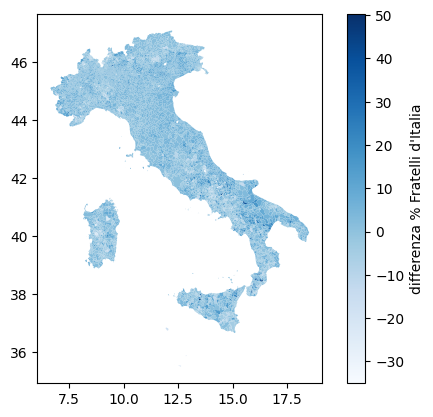

In [38]:
comuni_italiani_trend.plot(column="FRATELLI D'ITALIA", legend=True, cmap="Blues", legend_kwds={"label": "differenza % Fratelli d'Italia"})

<Axes: >

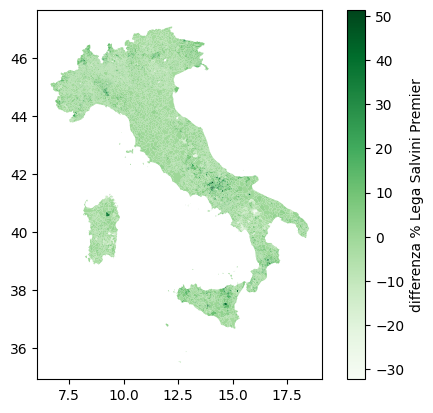

In [39]:
## vediamo trend lega

comuni_italiani_trend.plot(column="LEGA SALVINI PREMIER", legend=True, cmap="Greens", legend_kwds={"label": "differenza % Lega Salvini Premier"})

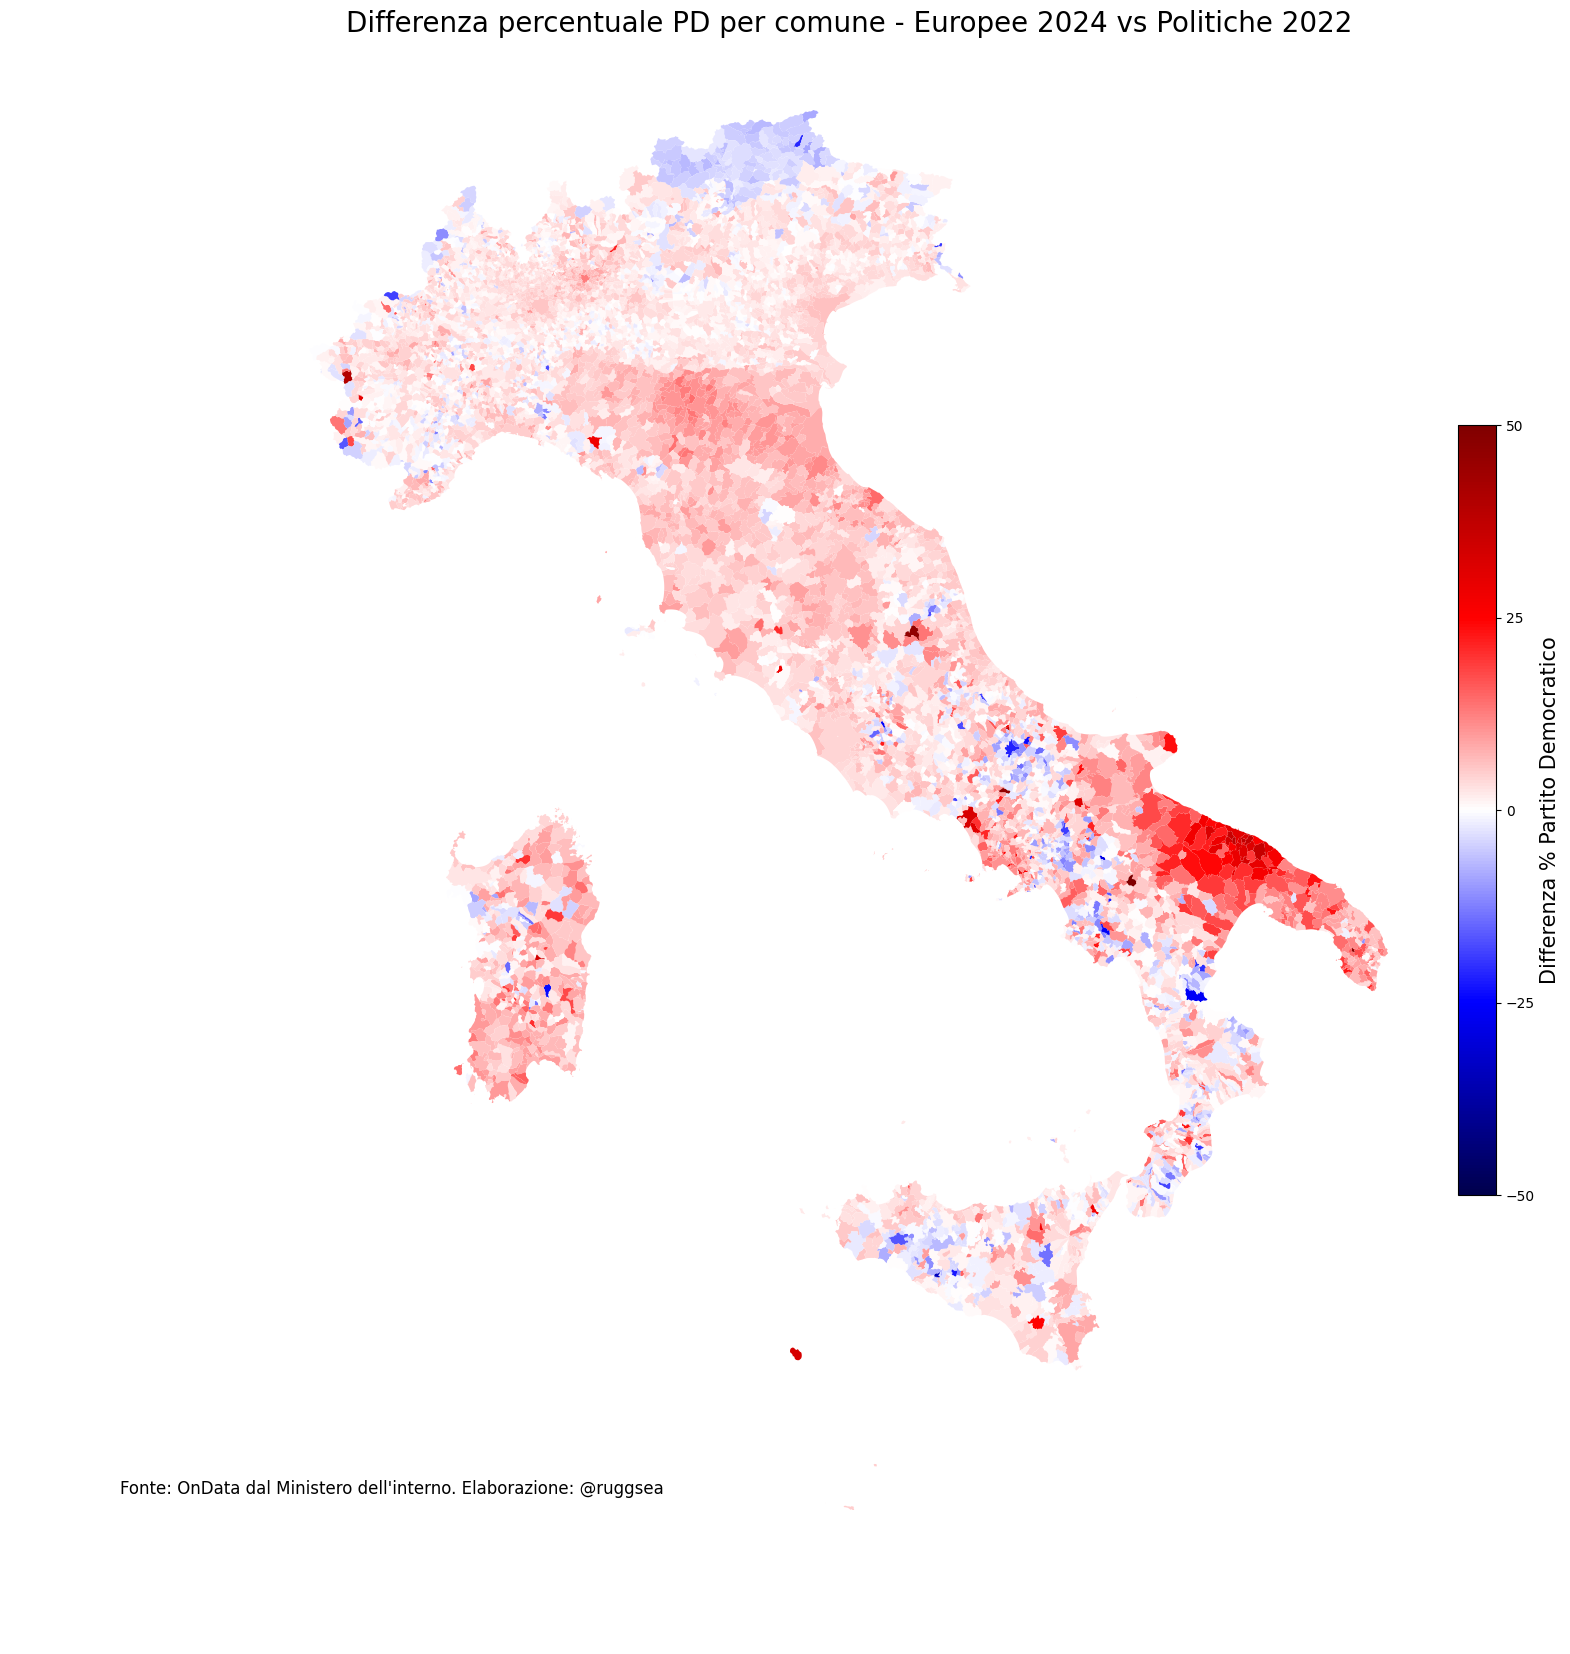

In [85]:
# vediamo trend PD

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
## legend title should be bigger, legend bar should be centered on the 0
comuni_italiani_trend.plot(column="PARTITO DEMOCRATICO", ax=ax, legend=True, cmap="seismic", legend_kwds={"label": "Differenza % Partito Democratico", "shrink": 0.5, "pad": 0.01, "ticks":[-50, -25, 0, 25, 50]}, vmin=-50, vmax=50)

ax.set_title("Differenza percentuale PD per comune - Europee 2024 vs Politiche 2022")
ax.title.set_size(20)

ax.axis("off")  

ax.annotate("Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", xy=(0.06, .08), xycoords="figure fraction", fontsize=12)

# make colorbar labels bigger
cbar = ax.get_figure().get_axes()[1]
cbar.yaxis.label.set_size(15)
# save tight layout


fig.savefig("trend_pd_europee_2024_politiche_2022_comune.png", dpi=300, bbox_inches="tight")

plt.show()




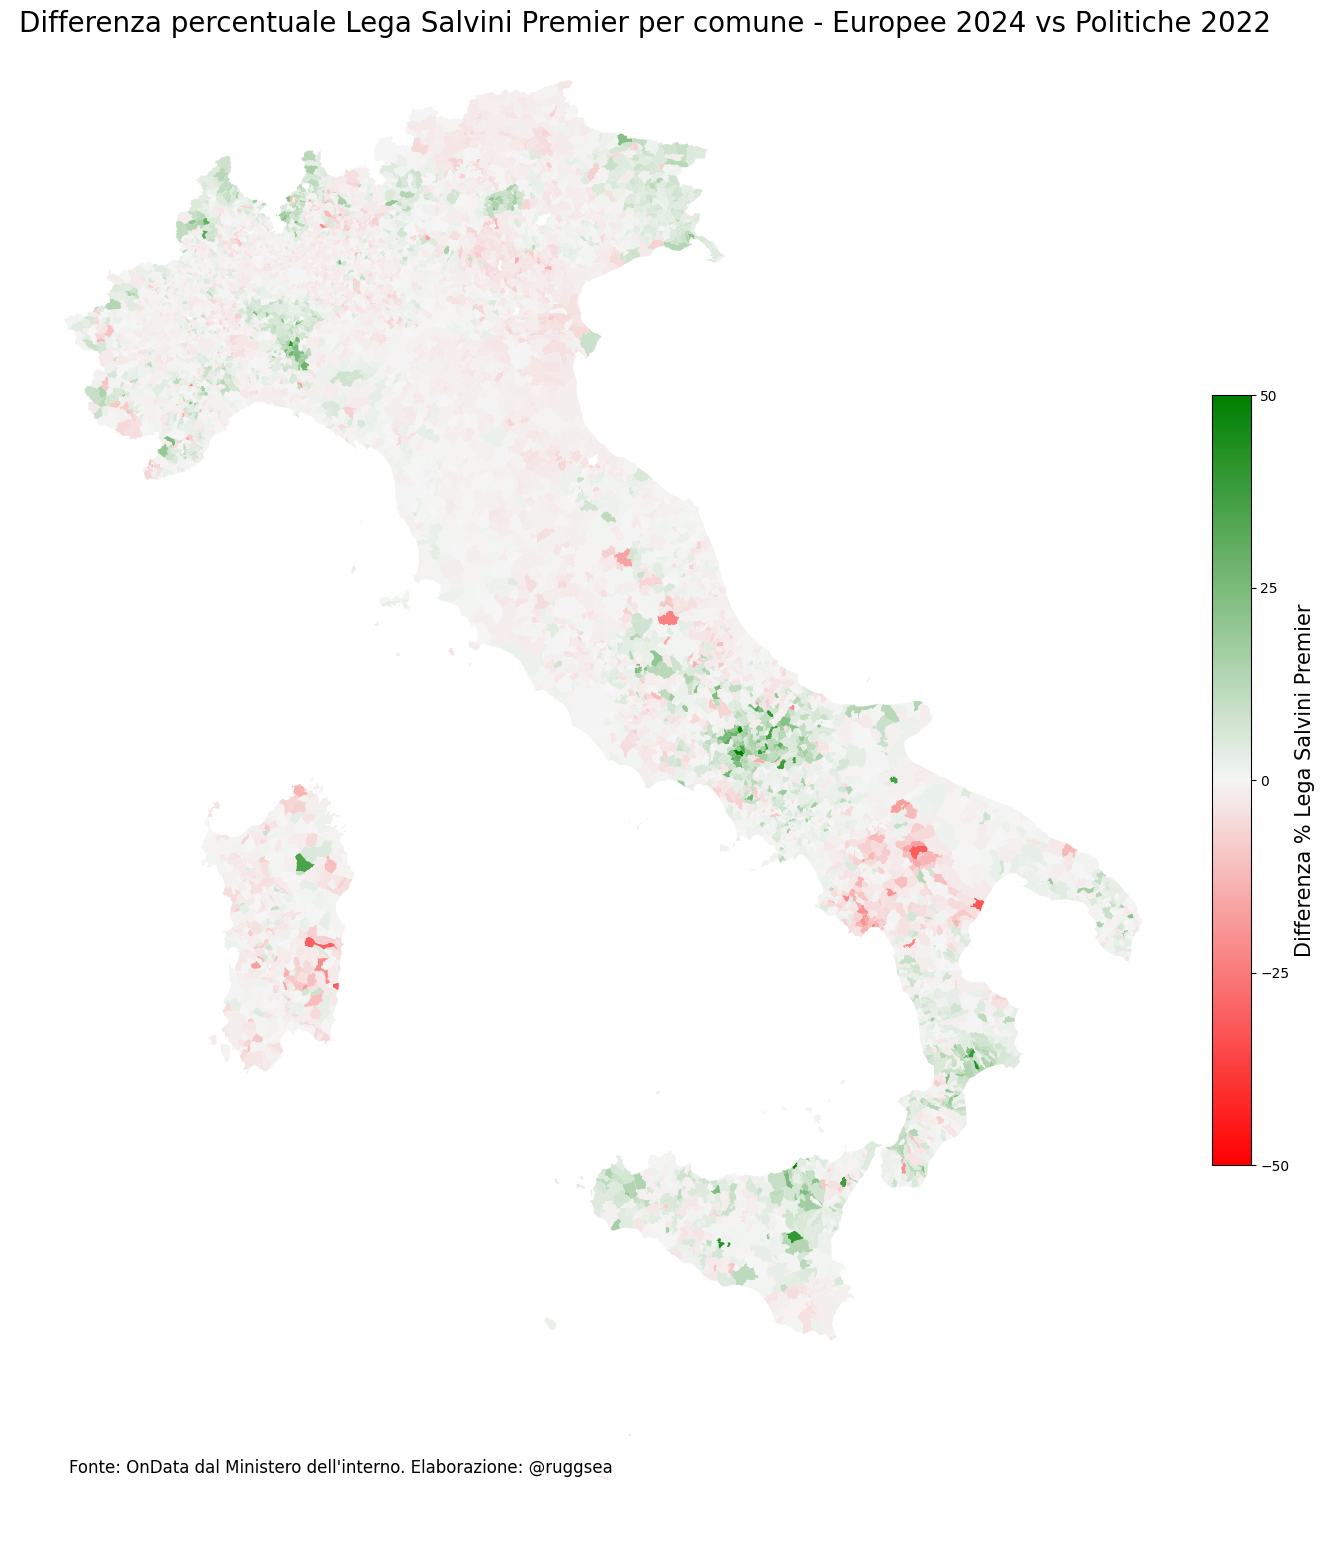

In [119]:
## lo stesso per la Lega
import matplotlib.pyplot as plt
# color matplotlib
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap that goes from red to white to green
cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["red", "whitesmoke", "green"])
## legend title should be bigger, legend bar should be centered on the 0
comuni_italiani_trend.plot(column="LEGA SALVINI PREMIER", ax=ax, legend=True, cmap=cmap, legend_kwds={"label": "Differenza % Lega Salvini Premier", "shrink": 0.5, "pad": 0.01, "ticks":[-50, -25, 0, 25, 50]}, vmin=-50, vmax=50)

fig.suptitle("Differenza percentuale Lega Salvini Premier per comune - Europee 2024 vs Politiche 2022", fontsize=20, y=0.88, x=0.5)
ax.title.set_size(20)

ax.axis("off")  

ax.text(0.05, 0.05, "Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", fontsize=12, transform=ax.transAxes)


# make colorbar labels bigger
cbar = ax.get_figure().get_axes()[1]
cbar.yaxis.label.set_size(15)
# save tight layout

fig.savefig("trend_lega_europee_2024_politiche_2022_comune.png", dpi=300, bbox_inches="tight")

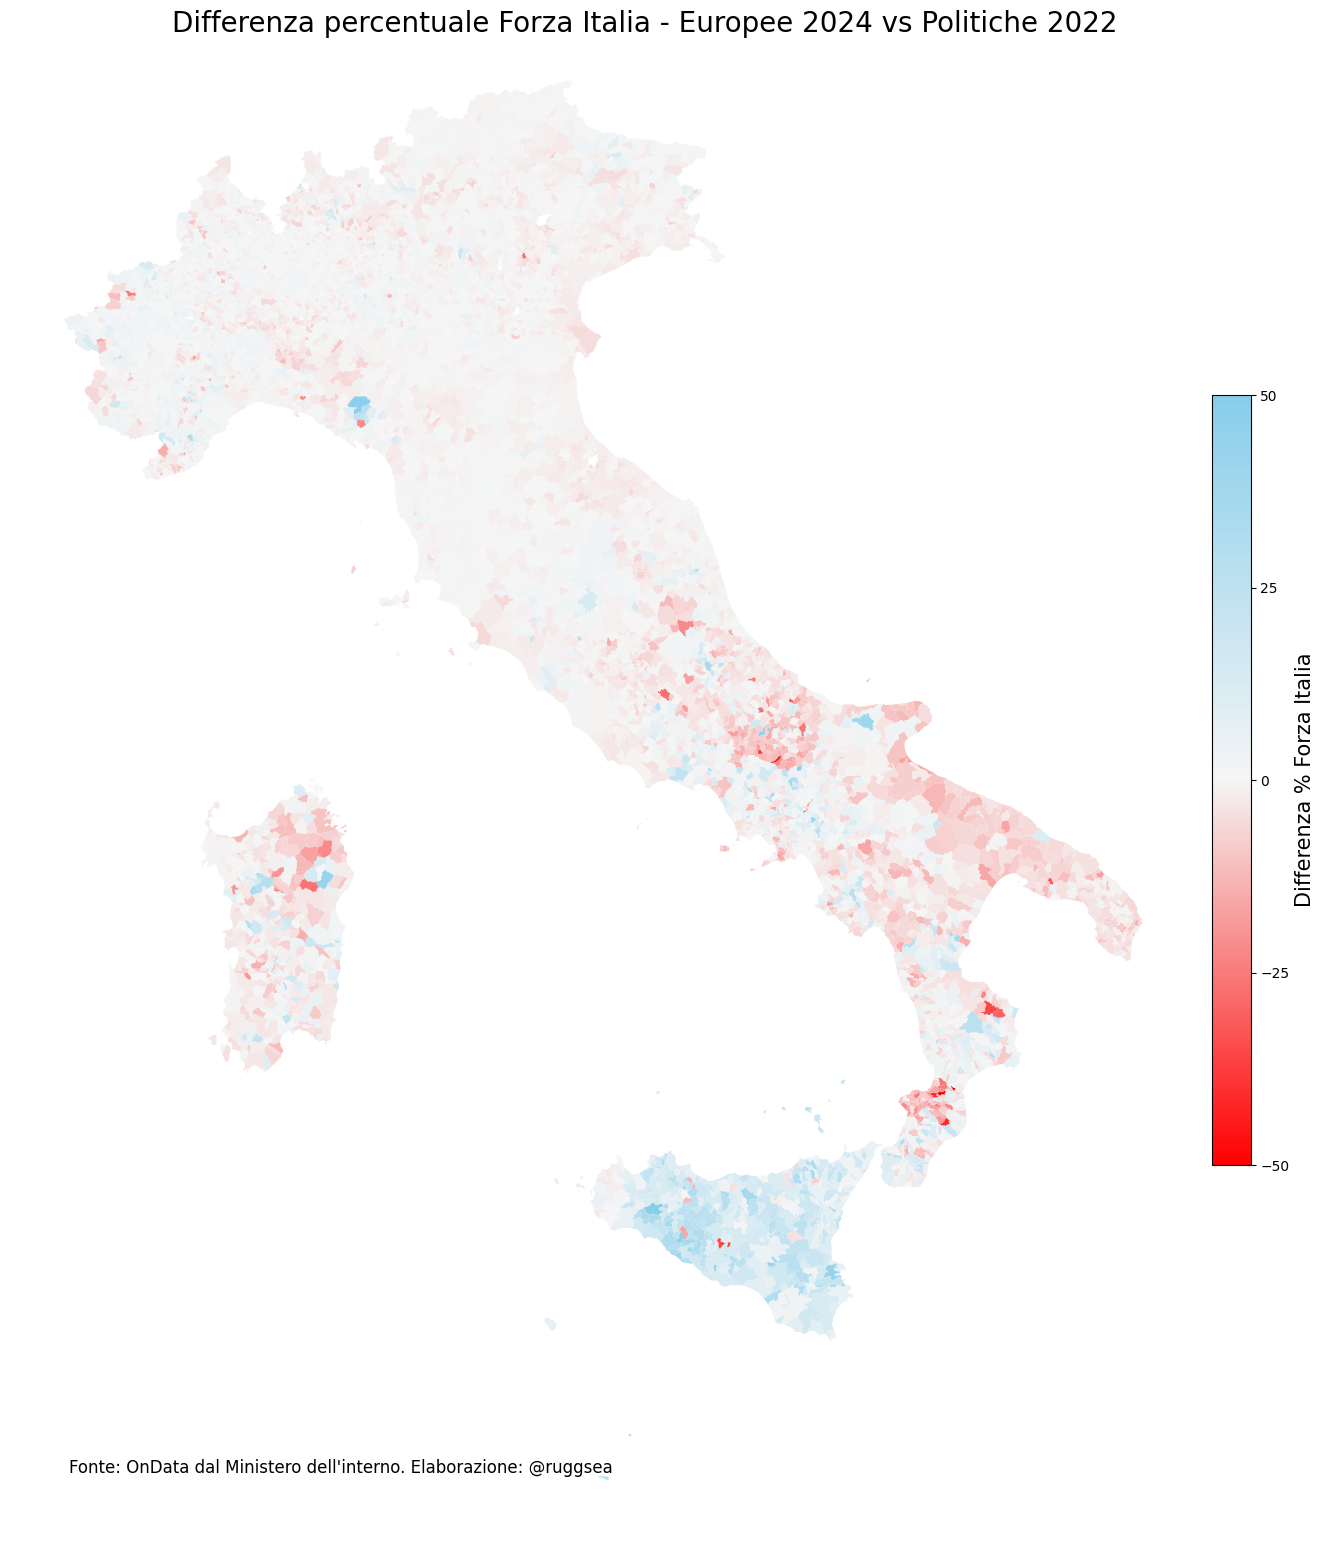

In [118]:
## stessa cosa per forza italia

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap that goes from red to white to skyblue
cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["red", "whitesmoke", "skyblue"])

comuni_italiani_trend.plot(column="FORZA ITALIA - NOI MODERATI - PPE", ax=ax, legend=True, cmap=cmap, legend_kwds={"label": "Differenza % Forza Italia", "shrink": 0.5, "pad": 0.01, "ticks":[-50, -25, 0, 25, 50]}, vmin=-50, vmax=50)

fig.suptitle("Differenza percentuale Forza Italia - Europee 2024 vs Politiche 2022", fontsize=20, y=0.88, x=0.5)
ax.title.set_size(20)

ax.axis("off")

ax.text(0.05, 0.05, "Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", fontsize=12, transform=ax.transAxes)

# make colorbar labels bigger
cbar = ax.get_figure().get_axes()[1]
cbar.yaxis.label.set_size(15)

# save tight layout
fig.savefig("trend_forza_italia_europee_2024_politiche_2022_comune.png", dpi=300, bbox_inches="tight")

plt.show()

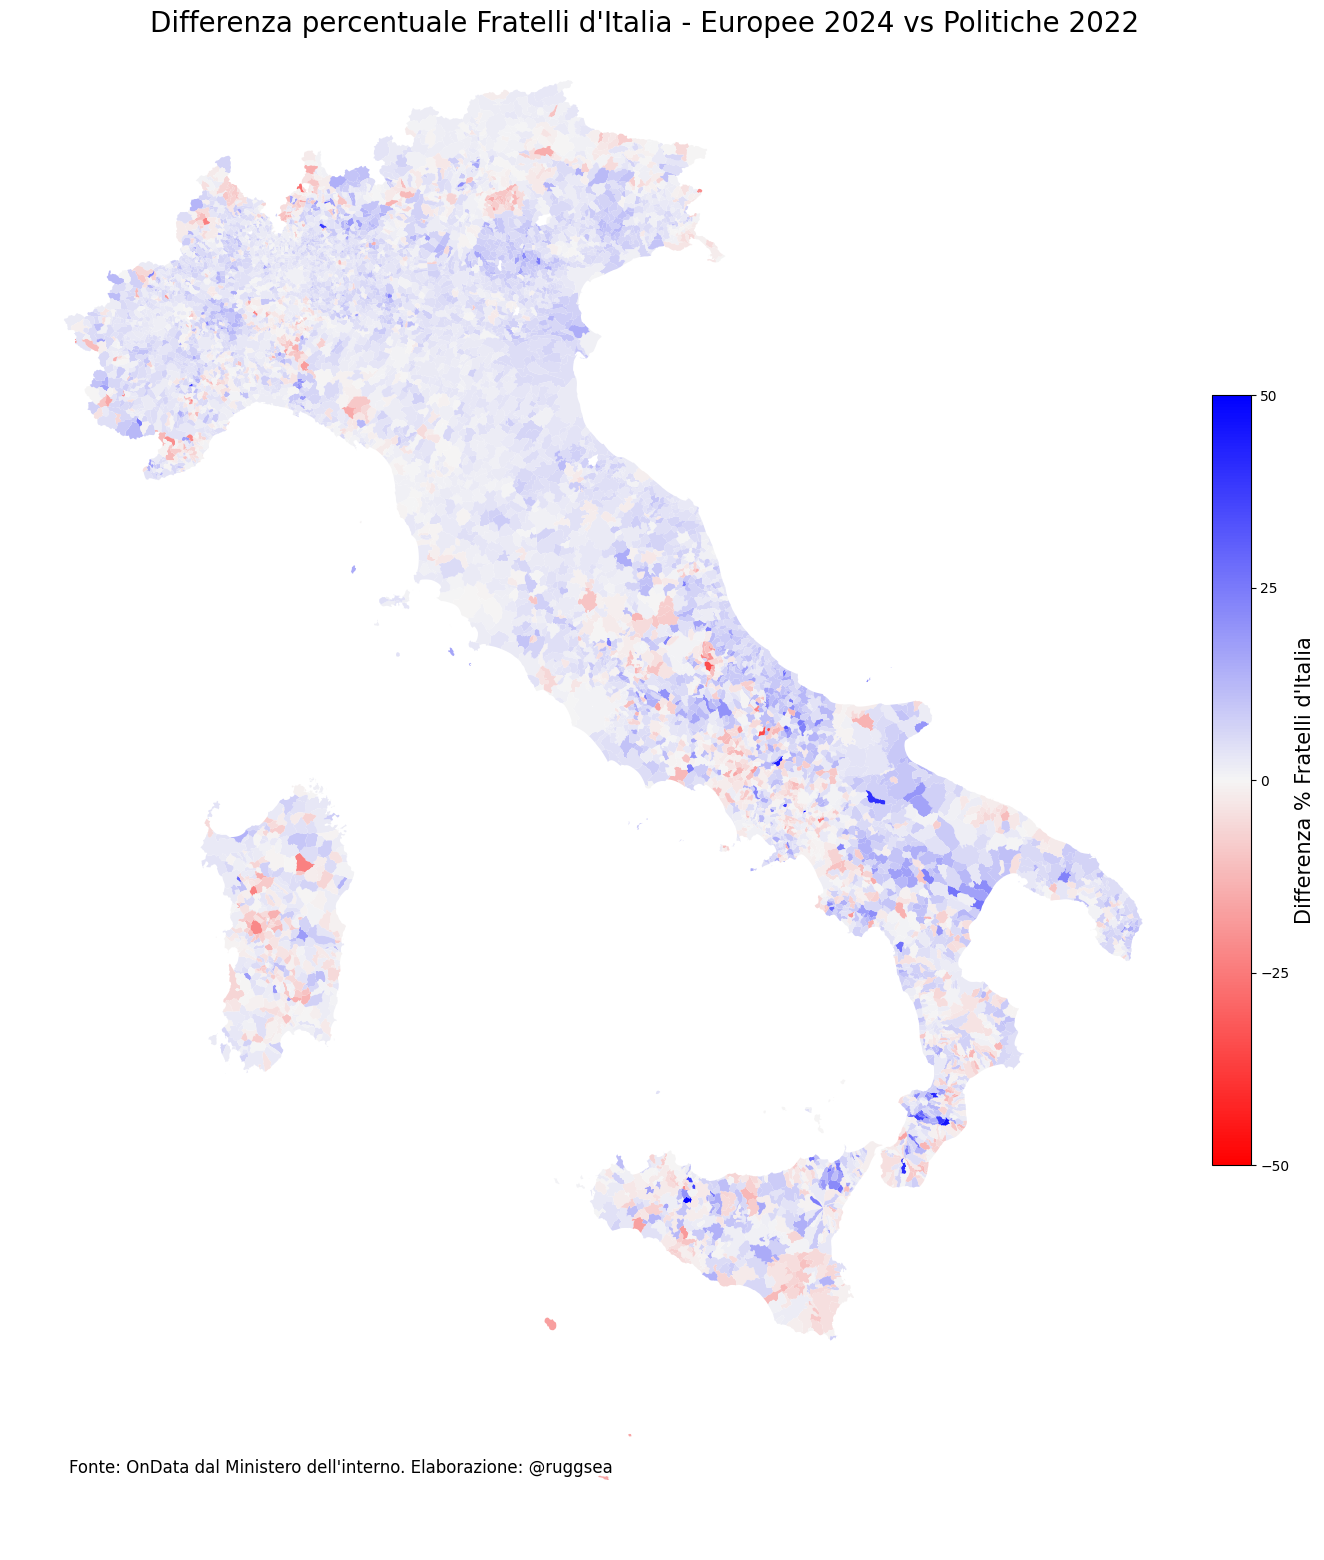

In [117]:
## stessa cosa fratelli d'italia

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap that goes from red to white to blue

cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["red", "whitesmoke", "blue"])

comuni_italiani_trend.plot(column="FRATELLI D'ITALIA", ax=ax, legend=True, cmap=cmap, legend_kwds={"label": "Differenza % Fratelli d'Italia", "shrink": 0.5, "pad": 0.01, "ticks":[-50, -25, 0, 25, 50]}, vmin=-50, vmax=50)

fig.suptitle("Differenza percentuale Fratelli d'Italia - Europee 2024 vs Politiche 2022", fontsize=20, y=0.88, x=0.5)
ax.title.set_size(20)

ax.axis("off")

ax.text(0.05, 0.05, "Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", fontsize=12, transform=ax.transAxes)

# make colorbar labels bigger

cbar = ax.get_figure().get_axes()[1]
cbar.yaxis.label.set_size(15)

# save tight layout

fig.savefig("trend_fratelli_d_italia_europee_2024_politiche_2022_comune.png", dpi=300, bbox_inches="tight")

plt.show()

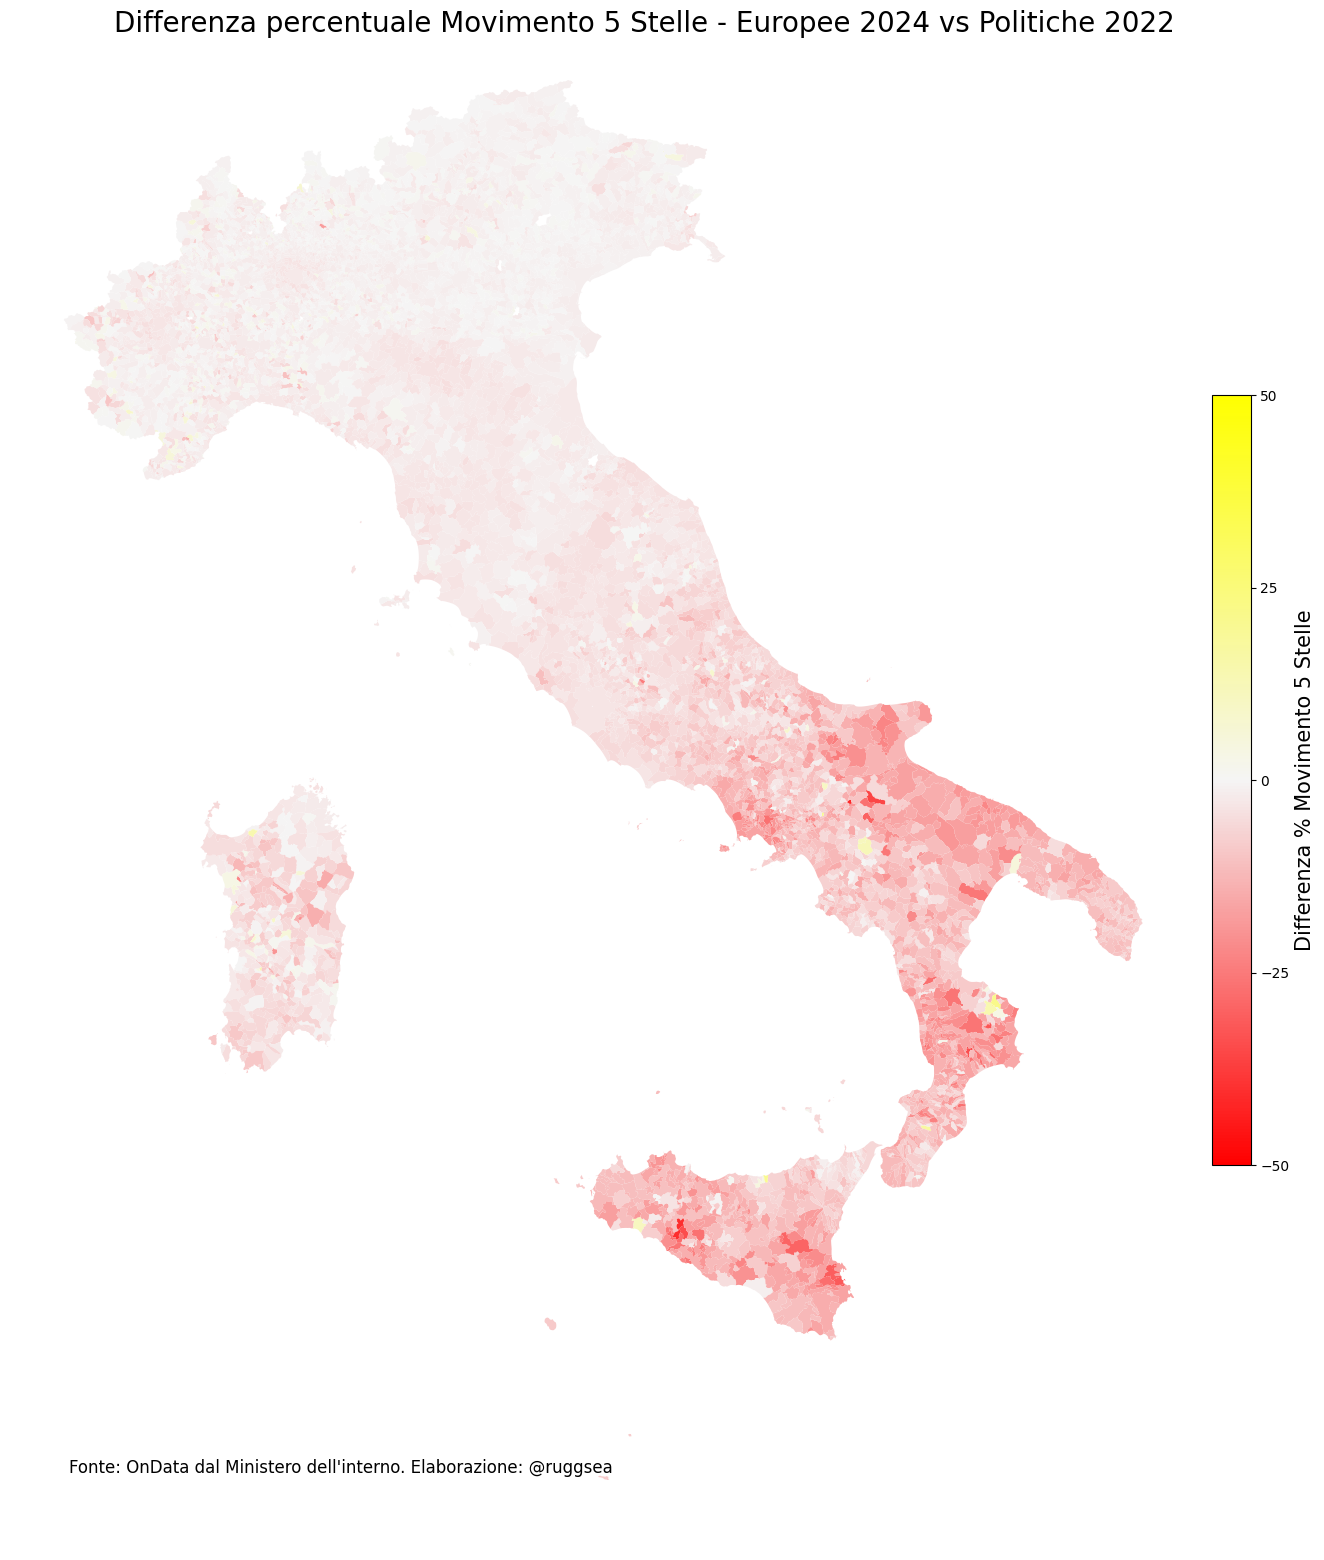

In [116]:
## m5s

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap that goes from red to white to yellow

cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["red", "whitesmoke", "yellow"])

comuni_italiani_trend.plot(column="MOVIMENTO 5 STELLE", ax=ax, legend=True, cmap=cmap, legend_kwds={"label": "Differenza % Movimento 5 Stelle", "shrink": 0.5, "pad": 0.01, "ticks":[-50, -25, 0, 25, 50]}, vmin=-50, vmax=50)

fig.suptitle("Differenza percentuale Movimento 5 Stelle - Europee 2024 vs Politiche 2022", fontsize=20, y=0.88)

ax.title.set_size(20)

ax.axis("off")

ax.text(0.05, 0.05, "Fonte: OnData dal Ministero dell'interno. Elaborazione: @ruggsea", fontsize=12, transform=ax.transAxes)

# make colorbar labels bigger

cbar = ax.get_figure().get_axes()[1]

cbar.yaxis.label.set_size(15)

# save tight layout

fig.savefig("trend_m5s_europee_2024_politiche_2022_comune.png", dpi=300, bbox_inches="tight")

plt.show()  
